# The Effects of COVID in Middlesex County, New Jersey
## By Preston Stringham

This analysis covers the COVID cases, vaccination, and hospitalization in Middlesex County, New Jersey. In particular, this analysis hopes to answer the following questions
* Is there a correlation in vaccination and hospitalizations rates in Middlesex County?
* Is there a difference in the mean change of hospitalization rates between JFK Medical Center and the rest county?
We will use the statsmodels package to do our statistical testing and matplotlib in order to visualize our data. 

In total, I use 5 datasets which are

* [raw U.S. confirmed COVID cases dataset by Johns Hopkins University](https://www.kaggle.com/antgoldbloom/covid19-data-from-john-hopkins-university?select=RAW_us_confirmed_cases.csv)
* [masking mandates by county dataset from the CDC](https://data.cdc.gov/Policy-Surveillance/U-S-State-and-Territorial-Public-Mask-Mandates-Fro/62d6-pm5i)
* [mask compliance survey taken by The New York Times](https://data.cdc.gov/Policy-Surveillance/U-S-State-and-Territorial-Public-Mask-Mandates-Fro/62d6-pm5i)
* [COVID-19 Reported Patient Impact and Hospital Capacity by Facility dataset taken from healthcare.gov](https://healthdata.gov/Hospital/COVID-19-Reported-Patient-Impact-and-Hospital-Capa/anag-cw7u)
* [COVID-19 Vaccinations in the United States,County dataset from the CDC](https://data.cdc.gov/Vaccinations/COVID-19-Vaccinations-in-the-United-States-County/8xkx-amqh)

More details about the data can be found in my github repository.

# COVID Cases
# Preprocessing

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

Let's import our data!

In [238]:
mask_df = pd.read_csv('data/raw/mask-use-by-county.csv')
case_df = pd.read_csv('data/raw/RAW_us_confirmed_cases.csv')
mandate_df = pd.read_csv('data/raw/mandates.csv')

In [239]:
mask_df = mask_df[mask_df['COUNTYFP'] == 34023]

Over 75% of people in the county always wear masks! This is only recorded at one time though.

In [240]:
mask_df

,COUNTYFP,NEVER,RARELY,SOMETIMES,FREQUENTLY,ALWAYS
1785,34023,0.02,0.016,0.054,0.146,0.765


In [241]:
mask_df.drop('COUNTYFP', inplace=True, axis=1)

This data contained lots of other counties/states, let's filter for just Middlesex, NJ.

In [242]:
mandate_df = mandate_df[(mandate_df['State_Tribe_Territory']=='NJ') & (mandate_df['County_Name']=='Middlesex County')]

In [243]:
mandate_df['date'] = pd.to_datetime(mandate_df["date"])

In [244]:
nj_df = case_df[(case_df['Province_State']=='New Jersey') & (case_df['Admin2']=='Middlesex')]

This data needs to be pivoted.

In [37]:
nj_df

,Province_State,Admin2,UID,iso2,iso3,code3,FIPS,Country_Region,Lat,Long_,...,10/22/21,10/23/21,10/24/21,10/25/21,10/26/21,10/27/21,10/28/21,10/29/21,10/30/21,10/31/21
1855,New Jersey,Middlesex,84034023,US,USA,840,34023.0,US,40.436299,-74.41427,...,105712,105834,105880,105950,106076,106166,106271,106341,106431,106507


In [245]:
cases_per_day = nj_df.iloc[:, 11:].T.reset_index()

In [246]:
cases_per_day.columns = ['date', 'cases']

In [247]:
cases_per_day['date'] = pd.to_datetime(cases_per_day['date'])

In [248]:
mandate_df

,State_Tribe_Territory,County_Name,FIPS_State,FIPS_County,date,order_code,Face_Masks_Required_in_Public,Source_of_Action,URL,Citation
474823,NJ,Middlesex County,34,23,2020-04-10,1,Yes,Official,https://nj.gov/infobank/eo/056murphy/pdf/EO-12...,"N.J. Exec. Order No. 122 (Apr. 8, 2020)"
474824,NJ,Middlesex County,34,23,2020-04-11,1,Yes,Official,https://nj.gov/infobank/eo/056murphy/pdf/EO-12...,"N.J. Exec. Order No. 122 (Apr. 8, 2020)"
474825,NJ,Middlesex County,34,23,2020-04-12,1,Yes,Official,https://nj.gov/infobank/eo/056murphy/pdf/EO-12...,"N.J. Exec. Order No. 122 (Apr. 8, 2020)"
474826,NJ,Middlesex County,34,23,2020-04-13,1,Yes,Official,https://nj.gov/infobank/eo/056murphy/pdf/EO-12...,"N.J. Exec. Order No.125 (Apr. 11, 2020)"
474827,NJ,Middlesex County,34,23,2020-04-14,1,Yes,Official,https://nj.gov/infobank/eo/056murphy/pdf/EO-12...,"N.J. Exec. Order No.125 (Apr. 11, 2020)"
...,...,...,...,...,...,...,...,...,...,...
1265395,NJ,Middlesex County,34,23,2021-08-11,2,No,Official,https://nj.gov/infobank/eo/056murphy/pdf/EO-25...,"N.J. Exec. Order No. 252 (Aug. 6, 2021)"
1265396,NJ,Middlesex County,34,23,2021-08-12,2,No,Official,https://nj.gov/infobank/eo/056murphy/pdf/EO-25...,"N.J. Exec. Order No. 252 (Aug. 6, 2021)"
1265397,NJ,Middlesex County,34,23,2021-08-13,2,No,Official,https://nj.gov/infobank/eo/056murphy/pdf/EO-25...,"N.J. Exec. Order No. 252 (Aug. 6, 2021)"
1265398,NJ,Middlesex County,34,23,2021-08-14,2,No,Official,https://nj.gov/infobank/eo/056murphy/pdf/EO-25...,"N.J. Exec. Order No. 252 (Aug. 6, 2021)"


In [249]:
cases_per_day

,date,cases
0,2020-01-22,0
1,2020-01-23,0
2,2020-01-24,0
3,2020-01-25,0
4,2020-01-26,0
...,...,...
644,2021-10-27,106166
645,2021-10-28,106271
646,2021-10-29,106341
647,2021-10-30,106431


In [250]:
cases_per_day = cases_per_day.merge(mandate_df, on='date', how='left')

All we care about is the number of cases, let's drop the rest of it to make our dataframe clean.

In [251]:
drops=['State_Tribe_Territory', 'County_Name', 'FIPS_State', 'FIPS_County', 'URL', 'Citation', 'Source_of_Action']

In [252]:
cases_per_day = cases_per_day.drop(drops, axis=1)

In [253]:
cases_per_day = cases_per_day.fillna(0)

In [254]:
cases_per_day

,date,cases,order_code,Face_Masks_Required_in_Public
0,2020-01-22,0,0.0,0
1,2020-01-23,0,0.0,0
2,2020-01-24,0,0.0,0
3,2020-01-25,0,0.0,0
4,2020-01-26,0,0.0,0
...,...,...,...,...
644,2021-10-27,106166,0.0,0
645,2021-10-28,106271,0.0,0
646,2021-10-29,106341,0.0,0
647,2021-10-30,106431,0.0,0


We now need to get the infection rate which is 

$$\frac{\text{daily case change}}{\text{population}}$$

In [255]:
for i in range(len(cases_per_day.index)-1):
    if cases_per_day.at[i+1, 'cases'] - cases_per_day.at[i, 'cases'] < 0:
        cases_per_day.at[i+1, 'daily_cases'] = 0
    else:
        cases_per_day.at[i+1, 'daily_cases'] = cases_per_day.at[i+1, 'cases'] - cases_per_day.at[i, 'cases']

In [256]:
population = 863162
for i in range(len(cases_per_day.index)):
    cases_per_day.at[i, 'infection_rate'] = cases_per_day.at[i, 'daily_cases'] / population

Then we find the chang in infection rate

In [257]:
for i in range(len(cases_per_day.index)-1):
        cases_per_day.at[i+1, 'infection_change'] = cases_per_day.at[i+1, 'infection_rate'] - cases_per_day.at[i, 'infection_rate']

In [258]:
cases_per_day = cases_per_day.fillna(0)

In [259]:
pd.set_option('display.max_rows', None)
cases_per_day

,date,cases,order_code,Face_Masks_Required_in_Public,daily_cases,infection_rate,infection_change
0,2020-01-22,0,0.0,0,0.0,0.000000,0.000000
1,2020-01-23,0,0.0,0,0.0,0.000000,0.000000
2,2020-01-24,0,0.0,0,0.0,0.000000,0.000000
3,2020-01-25,0,0.0,0,0.0,0.000000,0.000000
4,2020-01-26,0,0.0,0,0.0,0.000000,0.000000
5,2020-01-27,0,0.0,0,0.0,0.000000,0.000000
6,2020-01-28,0,0.0,0,0.0,0.000000,0.000000
7,2020-01-29,0,0.0,0,0.0,0.000000,0.000000
8,2020-01-30,0,0.0,0,0.0,0.000000,0.000000
9,2020-01-31,0,0.0,0,0.0,0.000000,0.000000


In [260]:
cases_per_day = cases_per_day[(cases_per_day['date'] >= '2020-02-01') & (cases_per_day['date'] <= '2021-10-15')]

In [261]:
cases_per_day = cases_per_day.reset_index(drop=True)

The order code is the type of mask mandate. For example, sometimes masks are only necessary inside businesses. These need to be labeled in our dataframe.

In [262]:
for i in range(len(cases_per_day.index)):
    if cases_per_day.at[i, 'order_code'] == 0:
        cases_per_day.at[i, 'color'] = 'red'
    if cases_per_day.at[i, 'order_code'] == 1:
        cases_per_day.at[i, 'color'] = 'green'
    if cases_per_day.at[i, 'order_code'] == 2:
        cases_per_day.at[i, 'color'] = 'blue'

In [263]:
import seaborn as sns

<AxesSubplot:xlabel='date', ylabel='cases'>

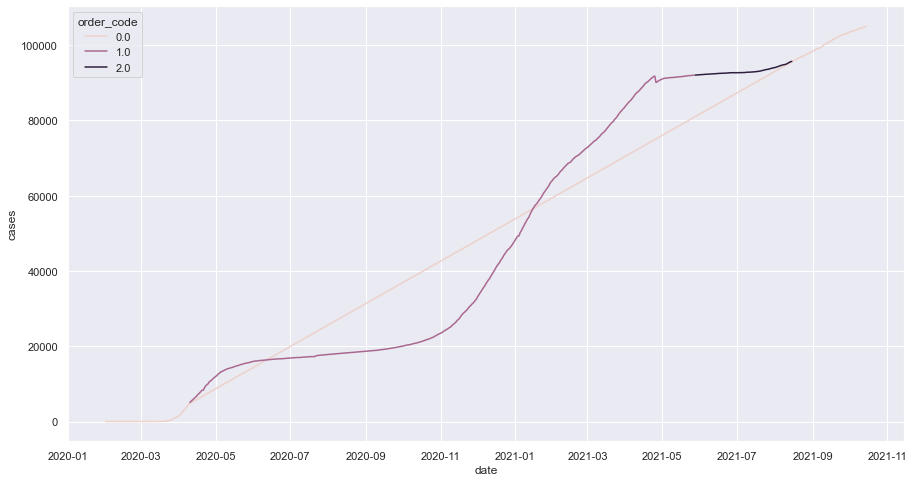

In [264]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.lineplot(data=cases_per_day, x="date", y="cases", hue="order_code")

Let's take a look at the infection rate

<AxesSubplot:xlabel='date', ylabel='infection_rate'>

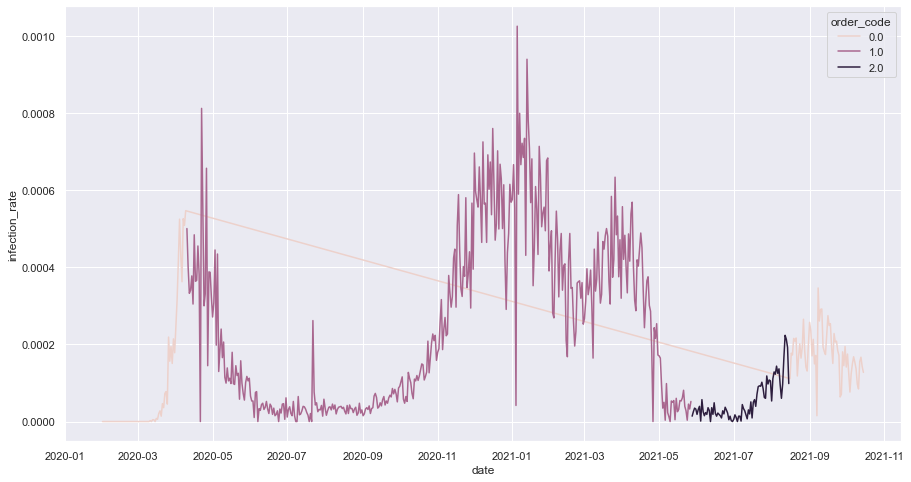

In [265]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.lineplot(data=cases_per_day, x="date", y="infection_rate", hue="order_code")

Seaborn was visualizing my data in a weird way. I will switch to matplotlib and then we will take a look at the change in infection rate.

In [267]:
std = 3*np.std(cases_per_day['infection_change'])
mean = np.mean(cases_per_day['infection_change'])
upper = mean+std
lower = mean-std

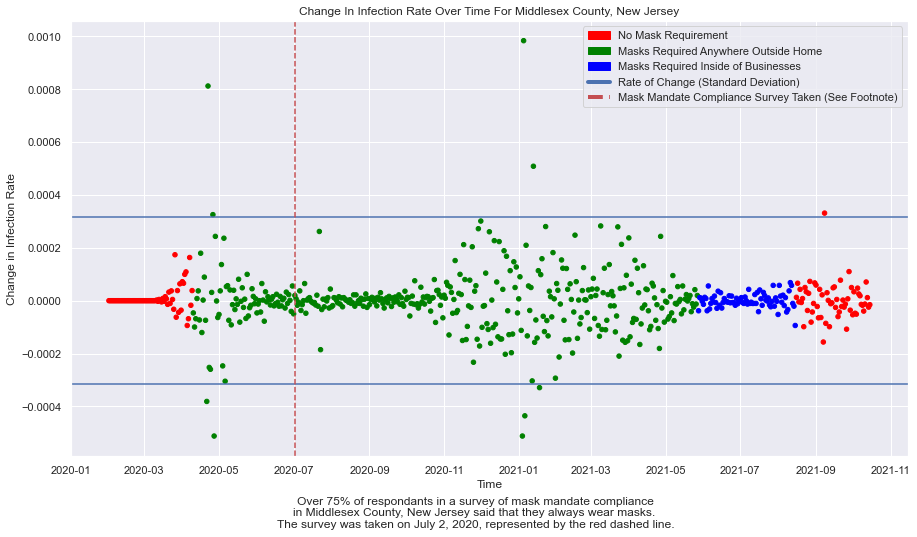

In [268]:
import matplotlib.patches as mpatches
from matplotlib.lines import Line2D
graph = cases_per_day.plot.scatter(x="date", y="infection_change", color=cases_per_day['color'])
txt="""Over 75% of respondants in a survey of mask mandate compliance
in Middlesex County, New Jersey said that they always wear masks. 
The survey was taken on July 2, 2020, represented by the red dashed line."""
plt.figtext(0.5, 0, txt, ha='center')
graph.axhline(upper)
graph.axhline(lower)
graph.axvline('2020-07-02', linestyle='--', c='r')
graph.set_xlabel('Time')
graph.set_ylabel('Change in Infection Rate')
graph.set_title('Change In Infection Rate Over Time For Middlesex County, New Jersey')
red_patch = mpatches.Patch(color='red', label='No Mask Requirement')
green_patch = mpatches.Patch(color='green', label='Masks Required Anywhere Outside Home')
blue_patch = mpatches.Patch(color='blue', label='Masks Required Inside of Businesses')
interval = Line2D([0], [0], color='b', lw=4, label='Rate of Change (Standard Deviation)')
mandate = Line2D([0], [0], color='r', lw=4, linestyle='--', label='Mask Mandate Compliance Survey Taken (See Footnote)')
graph.legend(handles=[red_patch, green_patch, blue_patch, interval, mandate])

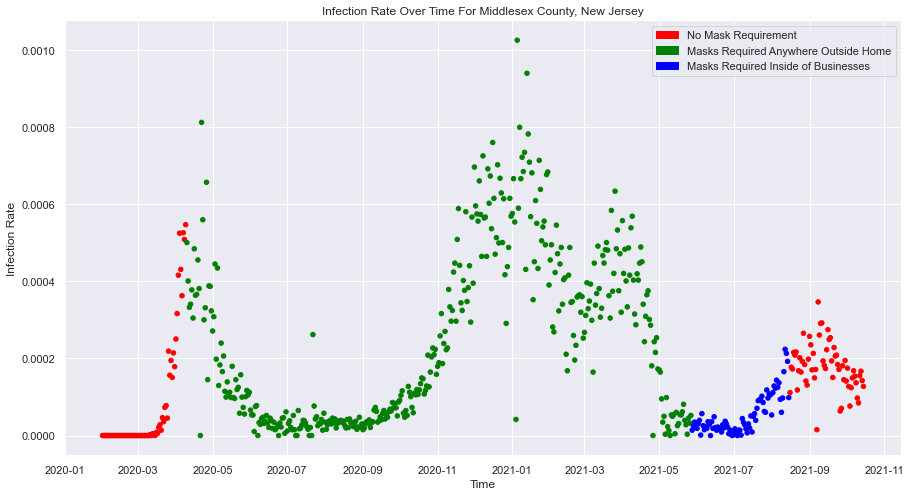

In [269]:
import matplotlib.patches as mpatches
graph = cases_per_day.plot.scatter(x="date", y="infection_rate", color=cases_per_day['color'])
graph.set_xlabel('Time')
graph.set_ylabel('Infection Rate')
graph.set_title('Infection Rate Over Time For Middlesex County, New Jersey')
red_patch = mpatches.Patch(color='red', label='No Mask Requirement')
green_patch = mpatches.Patch(color='green', label='Masks Required Anywhere Outside Home')
blue_patch = mpatches.Patch(color='blue', label='Masks Required Inside of Businesses')
graph.legend(handles=[red_patch, green_patch, blue_patch])

<AxesSubplot:>

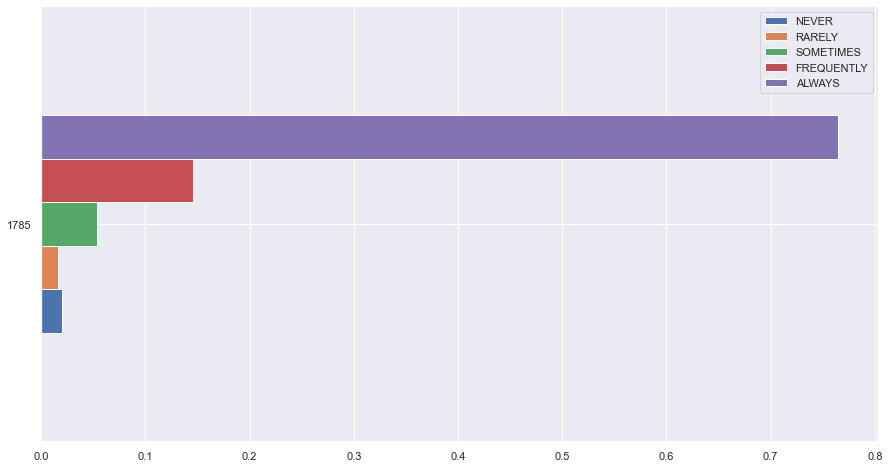

In [130]:
mask_df.plot.barh()

# Hospitalization and Vaccination

Let's now take a look at hospitalizations and vaccinations.

# Preprocessing

In [3]:
hosp_df = pd.read_csv('data/raw/hospitalizations.csv')
vacc_df = pd.read_csv('data/raw/vaccinations.csv')

In [465]:
hosp_df.head()

,hospital_pk,collection_week,state,ccn,hospital_name,address,city,zip,hospital_subtype,fips_code,is_metro_micro,total_beds_7_day_avg,all_adult_hospital_beds_7_day_avg,all_adult_hospital_inpatient_beds_7_day_avg,inpatient_beds_used_7_day_avg,all_adult_hospital_inpatient_bed_occupied_7_day_avg,total_adult_patients_hospitalized_confirmed_and_suspected_covid_7_day_avg,total_adult_patients_hospitalized_confirmed_covid_7_day_avg,total_pediatric_patients_hospitalized_confirmed_and_suspected_covid_7_day_avg,total_pediatric_patients_hospitalized_confirmed_covid_7_day_avg,inpatient_beds_7_day_avg,total_icu_beds_7_day_avg,total_staffed_adult_icu_beds_7_day_avg,icu_beds_used_7_day_avg,staffed_adult_icu_bed_occupancy_7_day_avg,staffed_icu_adult_patients_confirmed_and_suspected_covid_7_day_avg,staffed_icu_adult_patients_confirmed_covid_7_day_avg,total_patients_hospitalized_confirmed_influenza_7_day_avg,icu_patients_confirmed_influenza_7_day_avg,total_patients_hospitalized_confirmed_influenza_and_covid_7_day_avg,total_beds_7_day_sum,all_adult_hospital_beds_7_day_sum,all_adult_hospital_inpatient_beds_7_day_sum,inpatient_beds_used_7_day_sum,all_adult_hospital_inpatient_bed_occupied_7_day_sum,total_adult_patients_hospitalized_confirmed_and_suspected_covid_7_day_sum,total_adult_patients_hospitalized_confirmed_covid_7_day_sum,total_pediatric_patients_hospitalized_confirmed_and_suspected_covid_7_day_sum,total_pediatric_patients_hospitalized_confirmed_covid_7_day_sum,inpatient_beds_7_day_sum,total_icu_beds_7_day_sum,total_staffed_adult_icu_beds_7_day_sum,icu_beds_used_7_day_sum,staffed_adult_icu_bed_occupancy_7_day_sum,staffed_icu_adult_patients_confirmed_and_suspected_covid_7_day_sum,staffed_icu_adult_patients_confirmed_covid_7_day_sum,total_patients_hospitalized_confirmed_influenza_7_day_sum,icu_patients_confirmed_influenza_7_day_sum,total_patients_hospitalized_confirmed_influenza_and_covid_7_day_sum,total_beds_7_day_coverage,all_adult_hospital_beds_7_day_coverage,all_adult_hospital_inpatient_beds_7_day_coverage,inpatient_beds_used_7_day_coverage,all_adult_hospital_inpatient_bed_occupied_7_day_coverage,total_adult_patients_hospitalized_confirmed_and_suspected_covid_7_day_coverage,total_adult_patients_hospitalized_confirmed_covid_7_day_coverage,total_pediatric_patients_hospitalized_confirmed_and_suspected_covid_7_day_coverage,total_pediatric_patients_hospitalized_confirmed_covid_7_day_coverage,inpatient_beds_7_day_coverage,total_icu_beds_7_day_coverage,total_staffed_adult_icu_beds_7_day_coverage,icu_beds_used_7_day_coverage,staffed_adult_icu_bed_occupancy_7_day_coverage,staffed_icu_adult_patients_confirmed_and_suspected_covid_7_day_coverage,staffed_icu_adult_patients_confirmed_covid_7_day_coverage,total_patients_hospitalized_confirmed_influenza_7_day_coverage,icu_patients_confirmed_influenza_7_day_coverage,total_patients_hospitalized_confirmed_influenza_and_covid_7_day_coverage,previous_day_admission_adult_covid_confirmed_7_day_sum,previous_day_admission_adult_covid_confirmed_18-19_7_day_sum,previous_day_admission_adult_covid_confirmed_20-29_7_day_sum,previous_day_admission_adult_covid_confirmed_30-39_7_day_sum,previous_day_admission_adult_covid_confirmed_40-49_7_day_sum,previous_day_admission_adult_covid_confirmed_50-59_7_day_sum,previous_day_admission_adult_covid_confirmed_60-69_7_day_sum,previous_day_admission_adult_covid_confirmed_70-79_7_day_sum,previous_day_admission_adult_covid_confirmed_80+_7_day_sum,previous_day_admission_adult_covid_confirmed_unknown_7_day_sum,previous_day_admission_pediatric_covid_confirmed_7_day_sum,previous_day_covid_ED_visits_7_day_sum,previous_day_admission_adult_covid_suspected_7_day_sum,previous_day_admission_adult_covid_suspected_18-19_7_day_sum,previous_day_admission_adult_covid_suspected_20-29_7_day_sum,previous_day_admission_adult_covid_suspected_30-39_7_day_sum,previous_day_admission_adult_covid_suspected_40-49_7_day_sum,previous_day_admission_adult_covid_suspected_50-59_7_day_sum,previous_day_admission_adult

The hospital data is by facility and we must filter the hospitals by their zip code. After a quick google search for "zip codes in Middlesex County, New Jersey" we find a list of zip codes to filter with, which are listed below.

In [5]:
middlesex_zips = [8831, 8854, 8816, 8817, 8861, 8901, 8902, 8857, 8820, 7747, 8859, 8879, 8536, 7080, 7008, 7095, 7735, 8872, 8840, 8852, 8837, 8830, 7067, 8904, 7001, 8882, 8846, 8812, 8512, 8863, 8824, 8884, 8850, 8810, 7721, 7064, 8832, 8828, 7077, 8903, 8862, 8818, 8855, 8906, 8871, 8570, 8877, 8899, 8905, 8922, 8933, 8988, 8989]

In [6]:
facilities = []
for i in range(len(hosp_df.index)):
    if hosp_df.at[i, 'zip'] in middlesex_zips:
        facilities.append(i)
ms_hosp_df = hosp_df.iloc[facilities]

In [7]:
ms_vacc_df = vacc_df[(vacc_df['Recip_County'] == 'Middlesex County') & (vacc_df['Recip_State'] == 'NJ')]

In [123]:
def get_columns_from_name(df, name_arr):
    cols = []
    for i in name_arr:
        for j in df.columns:
            if i in j:
                cols.append(j)
    return cols

The hospital data has a lot of information in it, but I am interested in the number of ICU beds used in a given week, which is "icu_beds_used_7_day_sum"

In [124]:
columns = ['collection_week', 'hospital_name' 'bed']
get_columns_from_name(ms_hosp_df, ['bed'])

['total_beds_7_day_avg',
 'all_adult_hospital_beds_7_day_avg',
 'all_adult_hospital_inpatient_beds_7_day_avg',
 'inpatient_beds_used_7_day_avg',
 'all_adult_hospital_inpatient_bed_occupied_7_day_avg',
 'inpatient_beds_7_day_avg',
 'total_icu_beds_7_day_avg',
 'total_staffed_adult_icu_beds_7_day_avg',
 'icu_beds_used_7_day_avg',
 'staffed_adult_icu_bed_occupancy_7_day_avg',
 'total_beds_7_day_sum',
 'all_adult_hospital_beds_7_day_sum',
 'all_adult_hospital_inpatient_beds_7_day_sum',
 'inpatient_beds_used_7_day_sum',
 'all_adult_hospital_inpatient_bed_occupied_7_day_sum',
 'inpatient_beds_7_day_sum',
 'total_icu_beds_7_day_sum',
 'total_staffed_adult_icu_beds_7_day_sum',
 'icu_beds_used_7_day_sum',
 'staffed_adult_icu_bed_occupancy_7_day_sum',
 'total_beds_7_day_coverage',
 'all_adult_hospital_beds_7_day_coverage',
 'all_adult_hospital_inpatient_beds_7_day_coverage',
 'inpatient_beds_used_7_day_coverage',
 'all_adult_hospital_inpatient_bed_occupied_7_day_coverage',
 'inpatient_beds_7_day

In [166]:
ms_hosp_beds = ms_hosp_df[['hospital_name', 'collection_week', 'icu_beds_used_7_day_avg']].sort_values(['hospital_name', 'collection_week'])

I'm curious how many hospitals are in the zip codes we filtered with. Looks like there are 5 reporting hospitals in this dataset.

In [167]:
ms_hosp_beds['hospital_name'].unique()

array(["CHILDREN'S SPECIALIZED HOSPITAL", 'JFK UNIVERSITY MEDICAL CENTER',
       'PENN MEDICINE PRINCETON MEDICAL CENTER',
       'RARITAN BAY MEDICAL CENTER', "SAINT PETER'S UNIVERSITY HOSPITAL"],
      dtype=object)

In [168]:
ms_hosp_beds = ms_hosp_beds.groupby(['hospital_name', 'collection_week']).sum()

In [169]:
ms_hosp_beds = ms_hosp_beds.reset_index()

In [170]:
ms_hosp_beds

,hospital_name,collection_week,icu_beds_used_7_day_avg
0,CHILDREN'S SPECIALIZED HOSPITAL,2020/08/14,0.0
1,CHILDREN'S SPECIALIZED HOSPITAL,2020/08/21,0.0
2,CHILDREN'S SPECIALIZED HOSPITAL,2020/08/28,0.0
3,CHILDREN'S SPECIALIZED HOSPITAL,2020/09/04,0.0
4,CHILDREN'S SPECIALIZED HOSPITAL,2020/09/11,0.0
...,...,...,...
323,SAINT PETER'S UNIVERSITY HOSPITAL,2021/10/01,51.0
324,SAINT PETER'S UNIVERSITY HOSPITAL,2021/10/08,59.0
325,SAINT PETER'S UNIVERSITY HOSPITAL,2021/10/15,59.7
326,SAINT PETER'S UNIVERSITY HOSPITAL,2021/10/22,64.7


In [111]:
ms_hosp_beds['collection_date'] = pd.to_datetime(ms_hosp_beds['total_beds_7_day_avg'])

<AxesSubplot:xlabel='collection_week'>

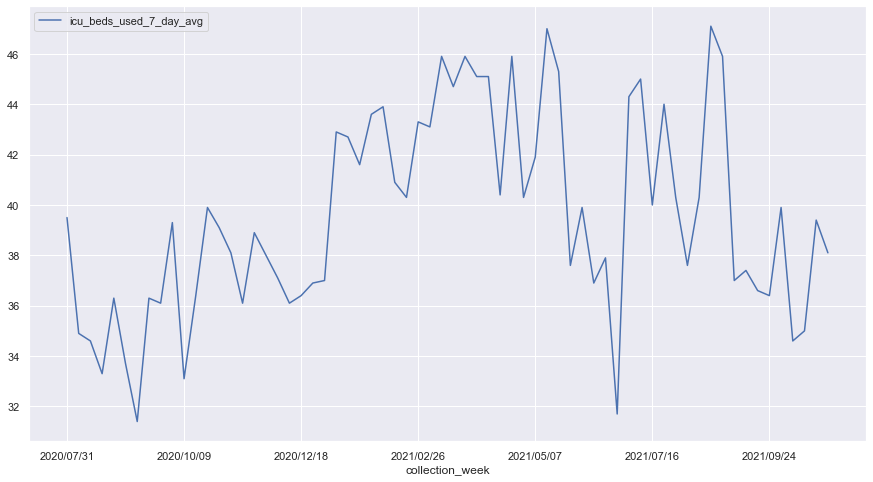

In [150]:
ms_hosp_beds[ms_hosp_beds['hospital_name'] == "JFK UNIVERSITY MEDICAL CENTER"][['collection_week', 'icu_beds_used_7_day_avg']].plot(x='collection_week', y='icu_beds_used_7_day_avg')

In [179]:
def process_hospitals(df):
    hospital_dfs = []
    hospitals = list(df['hospital_name'].unique())
    for i in hospitals:
        temp_df = df[df['hospital_name'] == i]
        temp_df = temp_df.set_index('collection_week')
        temp_df.drop('hospital_name', axis=1, inplace=True)
        hospital_dfs.append(temp_df)
    return hospital_dfs    

In [180]:
hosp_arr = process_hospitals(ms_hosp_beds)

In [198]:
ms_hosp_join = hosp_arr[0].join(hosp_arr[1], on='collection_week', how='outer', lsuffix='_0', rsuffix='_1')

In [199]:
for i in range(2, len(hosp_arr)):
    ms_hosp_join = ms_hosp_join.join(hosp_arr[i], on='collection_week', how='outer', rsuffix='_'+str(i))

In [200]:
ms_hosp_join = ms_hosp_join.fillna(0)

In [206]:
ms_hosp_join = ms_hosp_join.set_index('collection_week')

In [211]:
ms_hosp_join[ms_hosp_join['icu_beds_used_7_day_avg_3'].gt(0) == False] = 0

In [214]:
ms_hosp_sum = ms_hosp_join.sum(axis=1)

In [218]:
ms_hosp_sum = pd.DataFrame(ms_hosp_sum, columns=['icu_beds_used_7_day_avg_sum'])

<AxesSubplot:xlabel='collection_week'>

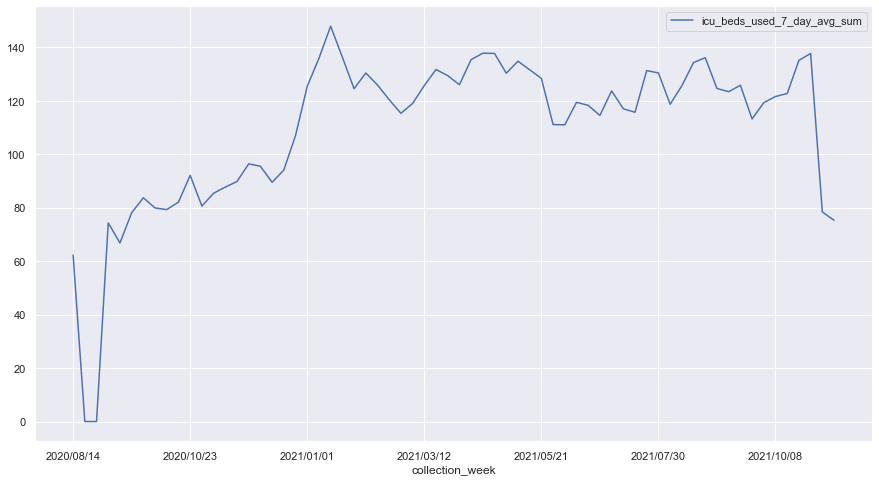

In [219]:
ms_hosp_sum.plot()

In [223]:
ms_hosp_sum = ms_hosp_sum.reset_index()

In [224]:
for i in range(len(ms_hosp_sum.index)-1):
    if ms_hosp_sum.at[i+1, 'icu_beds_used_7_day_avg_sum'] - ms_hosp_sum.at[i, 'icu_beds_used_7_day_avg_sum'] < 0:
        ms_hosp_sum.at[i+1, 'daily_icu_beds_used_7_day_avg_sum'] = 0
    else:
        ms_hosp_sum.at[i+1, 'daily_icu_beds_used_7_day_avg_sum'] = ms_hosp_sum.at[i+1, 'icu_beds_used_7_day_avg_sum'] - ms_hosp_sum.at[i, 'icu_beds_used_7_day_avg_sum']

In [225]:
ms_hosp_beds = ms_hosp_beds.fillna(0)

In [226]:
population = 863162
for i in range(len(ms_hosp_sum.index)):
    ms_hosp_sum.at[i, 'daily_icu_beds_used_7_day_avg_sum'] = ms_hosp_sum.at[i, 'daily_icu_beds_used_7_day_avg_sum'] / population

In [227]:
for i in range(len(ms_hosp_sum.index)-1):
        ms_hosp_sum.at[i+1, 'daily_icu_beds_used_7_day_avg_sum_change'] = ms_hosp_sum.at[i+1, 'daily_icu_beds_used_7_day_avg_sum'] - ms_hosp_sum.at[i, 'daily_icu_beds_used_7_day_avg_sum']

In [230]:
ms_hosp_sum = ms_hosp_sum.fillna(0)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='collection_week', ylabel='daily_icu_beds_used_7_day_avg_sum_change'>

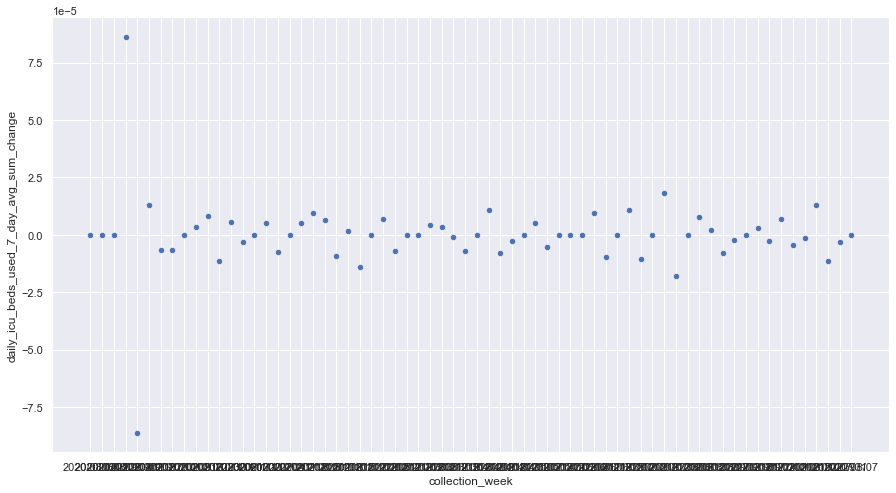

In [233]:
ms_hosp_sum[['collection_week', 'daily_icu_beds_used_7_day_avg_sum_change']].plot.scatter(x='collection_week', y='daily_icu_beds_used_7_day_avg_sum_change')

<AxesSubplot:>

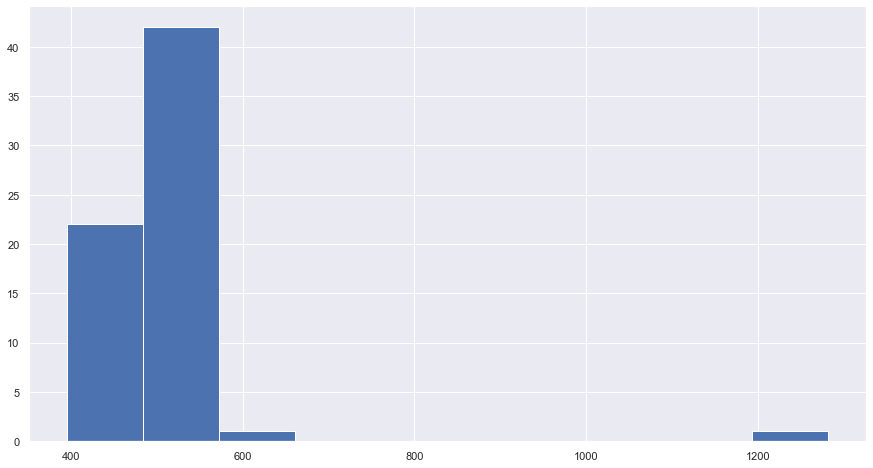

In [115]:
ms_hosp_beds[ms_hosp_beds['hospital_name'] == "JFK UNIVERSITY MEDICAL CENTER"]['total_beds_7_day_avg'].hist()

In [31]:
ms_vacc_df.sort_values(by='Date', ascending=False)

,Date,FIPS,MMWR_week,Recip_County,Recip_State,Series_Complete_Pop_Pct,Series_Complete_Yes,Series_Complete_12Plus,Series_Complete_12PlusPop_Pct,Series_Complete_18Plus,Series_Complete_18PlusPop_Pct,Series_Complete_65Plus,Series_Complete_65PlusPop_Pct,Completeness_pct,Administered_Dose1_Recip,Administered_Dose1_Pop_Pct,Administered_Dose1_Recip_12Plus,Administered_Dose1_Recip_12PlusPop_Pct,Administered_Dose1_Recip_18Plus,Administered_Dose1_Recip_18PlusPop_Pct,Administered_Dose1_Recip_65Plus,Administered_Dose1_Recip_65PlusPop_Pct,SVI_CTGY,Series_Complete_Pop_Pct_SVI,Series_Complete_12PlusPop_Pct_SVI,Series_Complete_18PlusPop_Pct_SVI,Series_Complete_65PlusPop_Pct_SVI,Metro_status,Series_Complete_Pop_Pct_UR_Equity,Series_Complete_12PlusPop_Pct_UR_Equity,Series_Complete_18PlusPop_Pct_UR_Equity,Series_Complete_65PlusPop_Pct_UR_Equity
1453,2021-11-13,34023,45,Middlesex County,NJ,64.9,535114,535090.0,75.5,494617,76.5,104989,82.2,93.6,620953.0,75.3,617428.0,87.2,571280.0,88.4,124177.0,97.2,B,8.0,8.0,8.0,8.0,Metro,4.0,4.0,4.0,4.0
5408,2021-11-13,34023,45,Middlesex County,NJ,64.9,535114,535090.0,75.5,494617,76.5,104989,82.2,93.6,620953.0,75.3,617428.0,87.2,571280.0,88.4,124177.0,97.2,B,8.0,8.0,8.0,8.0,Metro,4.0,4.0,4.0,4.0
7983,2021-11-12,34023,45,Middlesex County,NJ,64.8,534671,534648.0,75.5,494214,76.5,104911,82.1,93.6,619396.0,75.1,616580.0,87.0,570480.0,88.3,123939.0,97.0,B,8.0,8.0,8.0,8.0,Metro,4.0,4.0,4.0,4.0
10564,2021-11-11,34023,45,Middlesex County,NJ,64.8,534322,534299.0,75.4,493896,76.4,104852,82.1,93.6,618151.0,74.9,615924.0,86.9,569845.0,88.2,123753.0,96.9,B,8.0,8.0,8.0,8.0,Metro,4.0,4.0,4.0,4.0
16077,2021-11-10,34023,45,Middlesex County,NJ,64.7,533832,533809.0,75.4,493426,76.3,104729,82.0,93.6,616547.0,74.7,615063.0,86.8,569017.0,88.0,123492.0,96.7,B,8.0,8.0,8.0,8.0,Metro,4.0,4.0,4.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1090169,2020-12-17,34023,51,Middlesex County,NJ,0.0,0,0.0,0.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,B,NaN,NaN,NaN,NaN,Metro,NaN,NaN,NaN,NaN
1093441,2020-12-16,34023,51,Middlesex County,NJ,0.0,0,0.0,0.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,B,NaN,NaN,NaN,NaN,Metro,NaN,NaN,NaN,NaN
1096626,2020-12-15,34023,51,Middlesex County,NJ,0.0,0,0.0,0.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,B,NaN,NaN,NaN,NaN,Metro,NaN,NaN,NaN,NaN
1102339,2020-12-14,34023,51,Middlesex County,NJ,0.0,0,0.0,0.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,B,NaN,NaN,NaN,NaN,Metro,NaN,NaN,NaN,NaN


In [29]:
ms_vacc_df['Date'] = pd.to_datetime(ms_vacc_df["Date"])

<ipython-input-29-3c5e861d3d4e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ms_vacc_df['Date'] = pd.to_datetime(ms_vacc_df["Date"])


<AxesSubplot:xlabel='Date'>

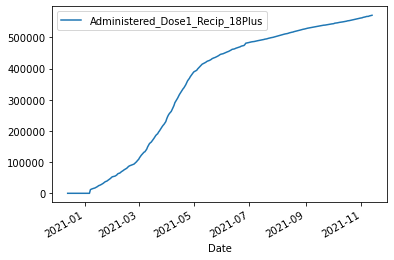

In [32]:
ms_vacc_df[['Date', 'Administered_Dose1_Recip_18Plus']].plot(x='Date', y='Administered_Dose1_Recip_18Plus')

In [33]:
ms_vacc_df_final = ms_vacc_df[['Date', 'Administered_Dose1_Recip_18Plus']]

In [44]:
ms_vacc_df_final = ms_vacc_df_final.sort_values(by='Date', ascending=True)

In [52]:
ms_vacc_df_final = ms_vacc_df_final.reset_index()

In [53]:
for i in range(len(ms_vacc_df_final.index)-1):
    if ms_vacc_df_final.at[i+1, 'Administered_Dose1_Recip_18Plus'] - ms_vacc_df_final.at[i, 'Administered_Dose1_Recip_18Plus'] < 0:
        print(ms_vacc_df_final.at[i+1, 'Administered_Dose1_Recip_18Plus'] - ms_vacc_df_final.at[i, 'Administered_Dose1_Recip_18Plus'])
        ms_vacc_df_final.at[i+1, 'vaccinations_daily'] = 0
    else:
        ms_vacc_df_final.at[i+1, 'vaccinations_daily'] = ms_vacc_df_final.at[i+1, 'Administered_Dose1_Recip_18Plus'] - ms_vacc_df_final.at[i, 'Administered_Dose1_Recip_18Plus']

In [54]:
ms_vacc_df_final

,level_0,index,Date,Administered_Dose1_Recip_18Plus,vaccinations_daily
0,336,1104810,2020-12-13,0.0,0.0
1,335,1102339,2020-12-14,0.0,0.0
2,334,1096626,2020-12-15,0.0,0.0
3,333,1093441,2020-12-16,0.0,0.0
4,332,1090169,2020-12-17,0.0,0.0
...,...,...,...,...,...
332,4,16077,2021-11-10,569017.0,1296.0
333,3,10564,2021-11-11,569845.0,828.0
334,2,7983,2021-11-12,570480.0,635.0
335,1,5408,2021-11-13,571280.0,800.0


<AxesSubplot:xlabel='Date'>

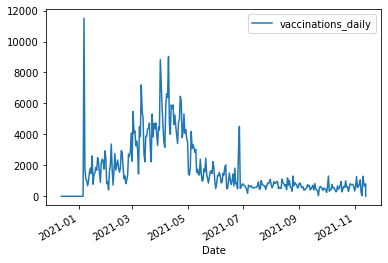

In [55]:
ms_vacc_df_final[['Date', 'vaccinations_daily']].plot(x='Date', y='vaccinations_daily')

In [56]:
population = 863162
for i in range(len(ms_vacc_df_final.index)):
    ms_vacc_df_final.at[i, 'vaccination_rate'] = ms_vacc_df_final.at[i, 'vaccinations_daily'] / population

<AxesSubplot:xlabel='Date'>

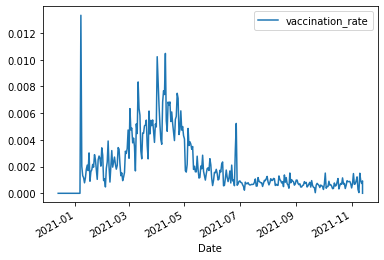

In [57]:
ms_vacc_df_final[['Date', 'vaccination_rate']].plot(x='Date', y='vaccination_rate')

In [58]:
for i in range(len(ms_vacc_df_final.index)-1):
        ms_vacc_df_final.at[i, 'vaccination_change'] = ms_vacc_df_final.at[i+1, 'vaccination_rate'] - ms_vacc_df_final.at[i, 'vaccination_rate']

In [63]:
ms_vacc_df_final

,level_0,index,Date,Administered_Dose1_Recip_18Plus,vaccinations_daily,vaccination_rate,vaccination_change
0,336,1104810,2020-12-13,0.0,0.0,0.000000,0.000000
1,335,1102339,2020-12-14,0.0,0.0,0.000000,0.000000
2,334,1096626,2020-12-15,0.0,0.0,0.000000,0.000000
3,333,1093441,2020-12-16,0.0,0.0,0.000000,0.000000
4,332,1090169,2020-12-17,0.0,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...
332,4,16077,2021-11-10,569017.0,1296.0,0.001501,-0.000542
333,3,10564,2021-11-11,569845.0,828.0,0.000959,-0.000224
334,2,7983,2021-11-12,570480.0,635.0,0.000736,0.000191
335,1,5408,2021-11-13,571280.0,800.0,0.000927,-0.000927


<AxesSubplot:xlabel='Date'>

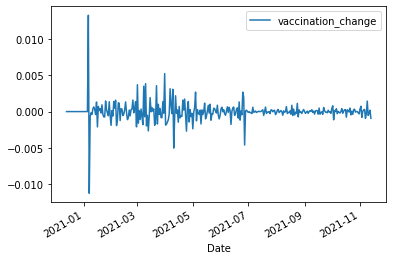

In [64]:
ms_vacc_df_final[['Date', 'vaccination_change']].plot(x='Date', y='vaccination_change')

In [68]:
import numpy as np
std = 3*np.std(ms_vacc_df_final['vaccination_change'])
mean = np.mean(ms_vacc_df_final['vaccination_change'])
upper_vac = mean+std
lower_vac = mean-std

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
No handles with labels found to put in legend.


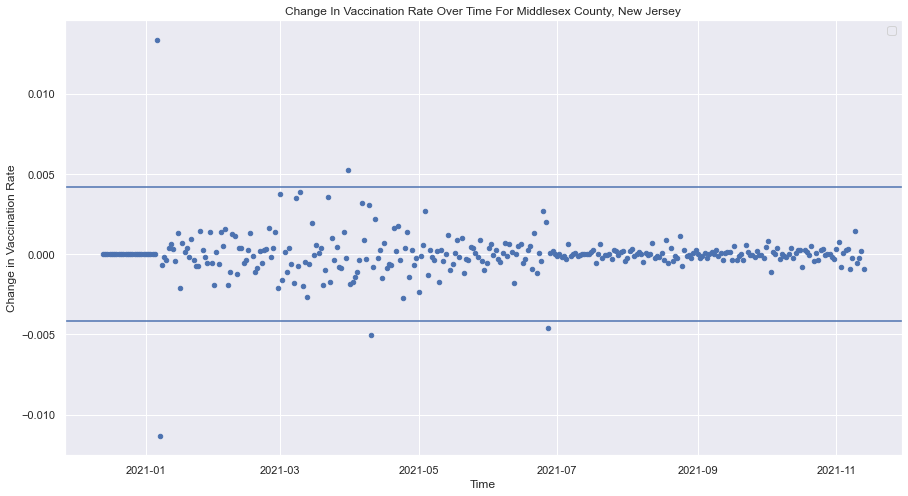

In [71]:
import matplotlib.patches as mpatches
from matplotlib.lines import Line2D
import seaborn as sns
sns.set(rc = {'figure.figsize':(15,8)})
graph = ms_vacc_df_final.plot.scatter(x="Date", y="vaccination_change")
graph.axhline(upper_vac)
graph.axhline(lower_vac)
graph.set_xlabel('Time')
graph.set_ylabel('Change in Vaccination Rate')
graph.set_title('Change In Vaccination Rate Over Time For Middlesex County, New Jersey')
red_patch = mpatches.Patch(color='red', label='No Mask Requirement')
graph.legend()

# Join Data

In [290]:
ms_vacc_df_final = ms_vacc_df_final.set_index('Date')

In [271]:
cases_per_day = cases_per_day.set_index('date')

In [281]:
ms_vacc_df_final = ms_vacc_df_final.reset_index()

In [283]:
ms_hosp_sum['collection_week'] = pd.to_datetime(ms_hosp_sum['collection_week'])

In [287]:
ms_vacc_df_final.iloc[1]['Date'] >= ms_hosp_sum.iloc[1]['collection_week']

True

In [322]:
ms_hosp_sum = ms_hosp_sum.set_index('collection_week')

In [318]:
ms_hosp_sum = ms_hosp_sum.reset_index()

In [373]:
test_df = ms_hosp_sum.join(ms_vacc_df_final, how='outer')

In [374]:
test_df_drop = test_df.dropna()

In [375]:
test_df_drop.drop('level_0', inplace=True, axis=1)

/Users/prestonstringham/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [376]:
test_df_drop = test_df_drop.reset_index()

In [378]:
test_df = test_df.fillna(0)

In [379]:
test_df.drop('level_0', inplace=True, axis=1)

In [380]:
test_df = test_df.reset_index()

In [389]:
test_df_drop

,level_0,icu_beds_used_7_day_avg_sum,daily_icu_beds_used_7_day_avg_sum,daily_icu_beds_used_7_day_avg_sum_change,vaccination_weekly
0,2020-12-18,94.1,0.000005,5.329243e-06,0
1,2020-12-25,107.0,0.000015,9.615808e-06,0
2,2021-01-01,125.4,0.000021,6.371921e-06,11503
3,2021-01-08,135.9,0.000012,-9.152395e-06,8950
4,2021-01-15,147.9,0.000014,1.737797e-06,11323
5,2021-01-22,136.3,0.000000,-1.390237e-05,13926
6,2021-01-29,124.5,0.000000,0.000000e+00,10944
7,2021-02-05,130.4,0.000007,6.835333e-06,14070
8,2021-02-12,125.9,0.000000,-6.835333e-06,15411
9,2021-02-19,120.4,0.000000,0.000000e+00,10273


In [361]:
len(test_df_drop.index)

357

In [383]:
test_df_drop['vaccination_weekly'] = 0
for i in range(len(test_df_drop.index)-1):
    test_df_drop.at[i, 'vaccination_weekly'] = test_df[(test_df['level_0'] >= test_df_drop.at[i, 'level_0']) & (test_df['level_0'] < test_df_drop.at[i+1, 'level_0'])]['vaccinations_daily'].sum()

In [385]:
test_df_drop.drop(['index', 'Administered_Dose1_Recip_18Plus'], axis=1, inplace=True)

In [387]:
test_df_drop.drop(['vaccinations_daily', 'vaccination_rate', 'vaccination_change'], axis=1, inplace=True)

In [390]:
population = 863162
for i in range(len(test_df_drop.index)):
    test_df_drop.at[i, 'vaccination_weekly_rate'] = test_df_drop.at[i, 'vaccination_weekly'] / population

In [391]:
for i in range(len(test_df_drop.index)-1):
        test_df_drop.at[i+1, 'vaccination_weekly_rate_change'] = test_df_drop.at[i+1, 'vaccination_weekly_rate'] - test_df_drop.at[i, 'vaccination_weekly_rate']

In [393]:
test_df_drop = test_df_drop.fillna(0)

In [397]:
test_df_drop = test_df_drop.set_index('level_0')

In [399]:
test_cases = test_df_drop.join(cases_per_day, how='outer')

In [401]:
test_cases = test_cases.reset_index()

In [402]:
test_cases

,index,icu_beds_used_7_day_avg_sum,daily_icu_beds_used_7_day_avg_sum,daily_icu_beds_used_7_day_avg_sum_change,vaccination_weekly,vaccination_weekly_rate,dvaccination_weekly_rate_change,cases,order_code,Face_Masks_Required_in_Public,daily_cases,infection_rate,infection_change,color
0,2020-02-01,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0,0.0,0.000000,0.000000,red
1,2020-02-02,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0,0.0,0.000000,0.000000,red
2,2020-02-03,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0,0.0,0.000000,0.000000,red
3,2020-02-04,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0,0.0,0.000000,0.000000,red
4,2020-02-05,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0,0.0,0.000000,0.000000,red
5,2020-02-06,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0,0.0,0.000000,0.000000,red
6,2020-02-07,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0,0.0,0.000000,0.000000,red
7,2020-02-08,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0,0.0,0.000000,0.000000,red
8,2020-02-09,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0,0.0,0.000000,0.000000,red
9,2020-02-10,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0,0.0,0.000000,0.000000,red


In [406]:
test_df_drop = test_df_drop.reset_index()

In [410]:
test_df_drop['cases_daily'] = 0
for i in range(len(test_df_drop.index)-1):
    test_df_drop.at[i, 'cases_weekly'] = test_cases[(test_cases['index'] >= test_df_drop.at[i, 'level_0']) & (test_cases['index'] < test_df_drop.at[i+1, 'level_0'])]['daily_cases'].sum()

In [412]:
test_df_drop = test_df_drop.fillna(0)

In [467]:
test_df_drop

,level_0,icu_beds_used_7_day_avg_sum,daily_icu_beds_used_7_day_avg_sum,daily_icu_beds_used_7_day_avg_sum_change,vaccination_weekly,vaccination_weekly_rate,dvaccination_weekly_rate_change,cases_daily,cases_weekly,cases_weekly_rate,cases_weekly_change
0,2020-12-18,94.1,0.000005,5.329243e-06,0,0.000000,0.000000,0,3437.0,0.003982,0.000000
1,2020-12-25,107.0,0.000015,9.615808e-06,0,0.000000,0.000000,0,2962.0,0.003432,-0.000550
2,2021-01-01,125.4,0.000021,6.371921e-06,11503,0.013327,0.013327,0,3670.0,0.004252,0.000820
3,2021-01-08,135.9,0.000012,-9.152395e-06,8950,0.010369,-0.002958,0,4281.0,0.004960,0.000708
4,2021-01-15,147.9,0.000014,1.737797e-06,11323,0.013118,0.002749,0,3384.0,0.003920,-0.001039
5,2021-01-22,136.3,0.000000,-1.390237e-05,13926,0.016134,0.003016,0,3351.0,0.003882,-0.000038
6,2021-01-29,124.5,0.000000,0.000000e+00,10944,0.012679,-0.003455,0,2806.0,0.003251,-0.000631
7,2021-02-05,130.4,0.000007,6.835333e-06,14070,0.016301,0.003622,0,2621.0,0.003037,-0.000214
8,2021-02-12,125.9,0.000000,-6.835333e-06,15411,0.017854,0.001554,0,2107.0,0.002441,-0.000595
9,2021-02-19,120.4,0.000000,0.000000e+00,10273,0.011902,-0.005953,0,1833.0,0.002124,-0.000317


In [455]:
population = 863162
for i in range(len(test_df_drop.index)):
    test_df_drop.at[i, 'cases_weekly_rate'] = test_df_drop.at[i, 'cases_weekly'] / population

In [456]:
for i in range(len(test_df_drop.index)-1):
        test_df_drop.at[i+1, 'cases_weekly_change'] = test_df_drop.at[i+1, 'cases_weekly_rate'] - test_df_drop.at[i, 'cases_weekly_rate']

In [457]:
test_df_drop = test_df_drop.fillna(0)

In [527]:
final_df = test_df_drop[['level_0', 'daily_icu_beds_used_7_day_avg_sum_change', 'dvaccination_weekly_rate_change', 'cases_weekly_change']]

In [469]:
final_df

,level_0,daily_icu_beds_used_7_day_avg_sum_change,dvaccination_weekly_rate_change,cases_weekly_change
0,2020-12-18,5.329243e-06,0.000000,0.000000
1,2020-12-25,9.615808e-06,0.000000,-0.000550
2,2021-01-01,6.371921e-06,0.013327,0.000820
3,2021-01-08,-9.152395e-06,-0.002958,0.000708
4,2021-01-15,1.737797e-06,0.002749,-0.001039
5,2021-01-22,-1.390237e-05,0.003016,-0.000038
6,2021-01-29,0.000000e+00,-0.003455,-0.000631
7,2021-02-05,6.835333e-06,0.003622,-0.000214
8,2021-02-12,-6.835333e-06,0.001554,-0.000595
9,2021-02-19,0.000000e+00,-0.005953,-0.000317


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='daily_icu_beds_used_7_day_avg_sum_change', ylabel='dvaccination_weekly_rate_change'>

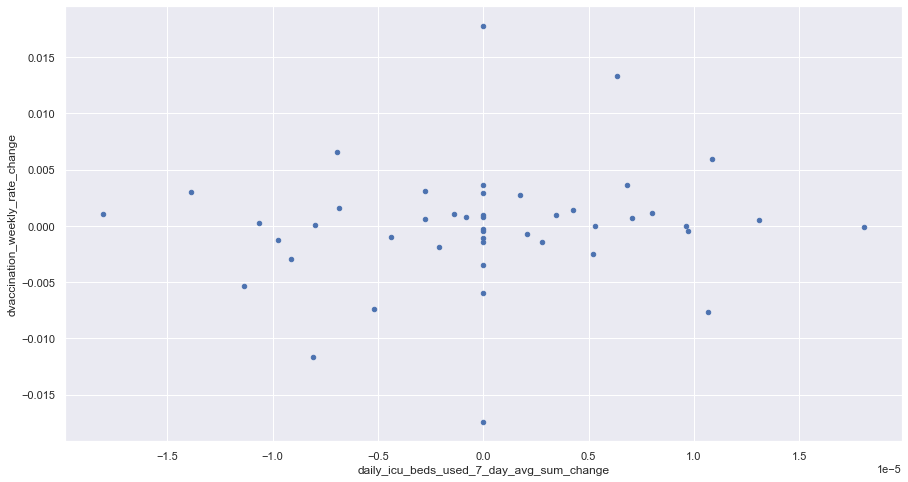

In [470]:
final_df[['daily_icu_beds_used_7_day_avg_sum_change', 'dvaccination_weekly_rate_change']].plot.scatter(x='daily_icu_beds_used_7_day_avg_sum_change', y='dvaccination_weekly_rate_change')

In [489]:
final_df['log_vaccination_weekly_rate'] = np.log(final_df['dvaccination_weekly_rate_change'])

/Users/prestonstringham/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/prestonstringham/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:726: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
<ipython-input-489-e2cc122e6fe9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['log_vaccination_weekly_rate_change'] = np.log(final_df['dvaccination_weekly_rate_change'])


In [491]:
final_df

,level_0,daily_icu_beds_used_7_day_avg_sum_change,dvaccination_weekly_rate_change,cases_weekly_change,log_vaccination_weekly_rate_change
0,2020-12-18,5.329243e-06,0.000000,0.000000,-inf
1,2020-12-25,9.615808e-06,0.000000,-0.000550,-inf
2,2021-01-01,6.371921e-06,0.013327,0.000820,-4.317995
3,2021-01-08,-9.152395e-06,-0.002958,0.000708,NaN
4,2021-01-15,1.737797e-06,0.002749,-0.001039,-5.896447
5,2021-01-22,-1.390237e-05,0.003016,-0.000038,-5.803938
6,2021-01-29,0.000000e+00,-0.003455,-0.000631,NaN
7,2021-02-05,6.835333e-06,0.003622,-0.000214,-5.620848
8,2021-02-12,-6.835333e-06,0.001554,-0.000595,-6.467187
9,2021-02-19,0.000000e+00,-0.005953,-0.000317,NaN


# Analysis

In [530]:
import statsmodels.api as sm0
mod = sm.OLS(final_df.daily_icu_beds_used_7_day_avg_sum_change, final_df.dvaccination_weekly_rate_change)
res = mod.fit()
print(res.summary())

                                            OLS Regression Results                                           
Dep. Variable:     daily_icu_beds_used_7_day_avg_sum_change   R-squared (uncentered):                   0.014
Model:                                                  OLS   Adj. R-squared (uncentered):             -0.008
Method:                                       Least Squares   F-statistic:                             0.6313
Date:                                      Tue, 07 Dec 2021   Prob (F-statistic):                       0.431
Time:                                              21:54:45   Log-Likelihood:                          479.09
No. Observations:                                        46   AIC:                                     -956.2
Df Residuals:                                            45   BIC:                                     -954.4
Df Model:                                                 1                                                  
Covariance

In [430]:
jfk_hospital = ms_hosp_join['icu_beds_used_7_day_avg_1']

In [432]:
ms_hosp_join.drop('icu_beds_used_7_day_avg_1', inplace=True, axis=1)

In [435]:
ms_hosp_join['not_jfk'] = ms_hosp_join.sum(axis=1)

In [437]:
ms_hosp_join['jfk'] = jfk_hospital

In [438]:
ms_hosp_join

,icu_beds_used_7_day_avg_0,icu_beds_used_7_day_avg,icu_beds_used_7_day_avg_3,icu_beds_used_7_day_avg_4,not_jfk,jfk
collection_week,,,,,,
2020/08/14,0.0,10.1,4.6,13.0,27.7,34.6
2020/08/21,0.0,0.0,0.0,0.0,0.0,0.0
2020/08/28,0.0,0.0,0.0,0.0,0.0,0.0
2020/09/04,0.0,25.3,6.5,8.8,40.6,33.7
2020/09/11,0.0,13.4,11.4,10.6,35.4,31.4
2020/09/18,0.0,16.7,9.7,15.4,41.8,36.3
2020/09/25,0.0,19.0,10.7,17.9,47.6,36.1
2020/10/02,0.0,17.9,8.7,14.0,40.6,39.3
2020/10/09,0.0,15.6,12.7,17.9,46.2,33.1


In [439]:
ms_hosp_join.drop(['icu_beds_used_7_day_avg_0', 'icu_beds_used_7_day_avg', 'icu_beds_used_7_day_avg_3', 'icu_beds_used_7_day_avg_4'], inplace=True, axis=1)

In [496]:
ms_hosp_join = ms_hosp_join.set_index('collection_week')

<AxesSubplot:title={'center':'JFK Medical Center ICU Beds Used vs Middlesex County'}, xlabel='collection_week'>

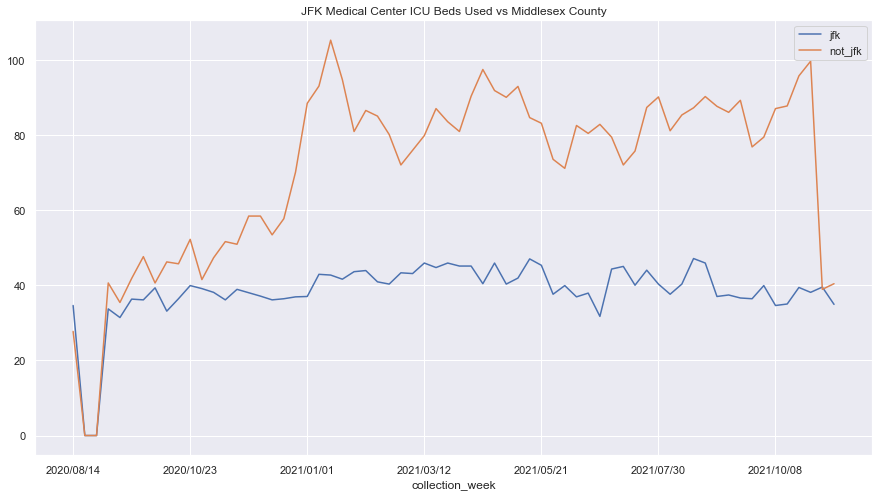

In [497]:
ms_hosp_join[['jfk', 'not_jfk']].plot(title="JFK Medical Center ICU Beds Used vs Middlesex County")

array([[<AxesSubplot:title={'center':'not_jfk'}>,
        <AxesSubplot:title={'center':'jfk'}>]], dtype=object)

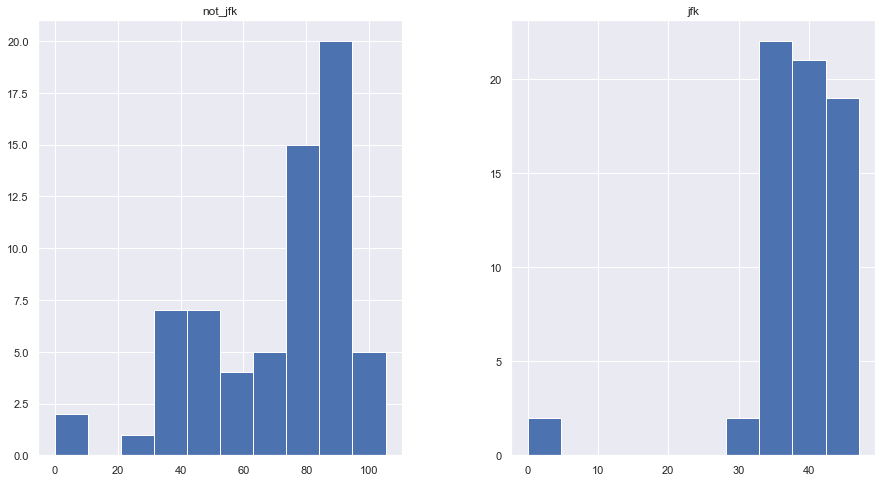

In [464]:
ms_hosp_join.hist()

In [482]:
ms_hosp_join = ms_hosp_join.fillna(0)

In [476]:
ms_hosp_join = ms_hosp_join.reset_index()

In [477]:
population = 863162
for i in range(len(ms_hosp_join.index)):
    ms_hosp_join.at[i, 'not_jfk_rate'] = ms_hosp_join.at[i, 'not_jfk'] / population
for i in range(len(ms_hosp_join.index)):
    ms_hosp_join.at[i, 'jfk_rate'] = ms_hosp_join.at[i, 'jfk'] / population

In [479]:
for i in range(len(ms_hosp_join.index)-1):
        ms_hosp_join.at[i+1, 'not_jfk_change'] = ms_hosp_join.at[i+1, 'not_jfk_rate'] - ms_hosp_join.at[i, 'not_jfk_rate']
for i in range(len(ms_hosp_join.index)-1):
        ms_hosp_join.at[i+1, 'jfk_change'] = ms_hosp_join.at[i+1, 'jfk_rate'] - ms_hosp_join.at[i, 'jfk_rate']

In [503]:
ms_hosp_join = ms_hosp_join.reset_index()

Text(0.5, 1.0, 'Change In Hospitalization Rate Over Time For Middlesex County, New Jersey')

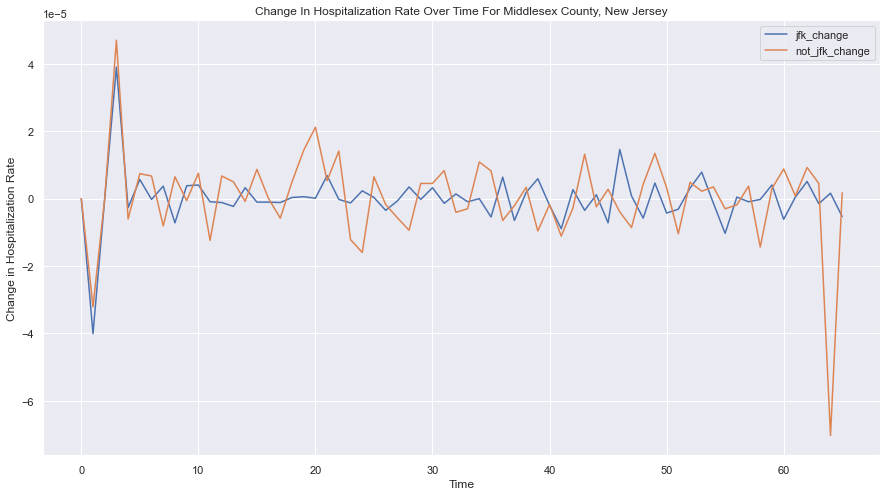

In [521]:
import numpy as np

upper_hosp = mean+std
lower_hosp = mean-std
import matplotlib.patches as mpatches
from matplotlib.lines import Line2D
import seaborn as sns
sns.set(rc = {'figure.figsize':(15,8)})
graph = ms_hosp_join[['collection_week', 'jfk_change', 'not_jfk_change']].plot()
graph.set_xlabel('Time')
graph.set_ylabel('Change in Hospitalization Rate')
graph.set_title('Change In Hospitalization Rate Over Time For Middlesex County, New Jersey')

In [483]:
stats.levene(ms_hosp_join['jfk_change'], ms_hosp_join['not_jfk_change'])

LeveneResult(statistic=6.405549265469297, pvalue=0.012568668711744621)

In [511]:
from scipy import stats
stats.ttest_ind(ms_hosp_join['jfk_change'], ms_hosp_join['not_jfk_change'], equal_var=False)

Ttest_indResult(statistic=-0.11183871353169725, pvalue=0.9111623539356889)